In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
file = 'Hedge_Fund/data/PS_7_Buffetts_exercise (1).xlsx'
factor = pd.read_excel(file,sheet_name='factors',parse_dates=['date'],index_col=0)
data = pd.read_excel(file,sheet_name='buffet_data',parse_dates=['date'],index_col='date')

In [3]:
factor.head()

,RF,Mkt-RF,SMB,HML,QMJ,BAB,UMD
date,,,,,,,
1976-10-29,0.0041,-0.0242,0.0025,-0.0013,0.000291,0.009824,-0.0048
1976-11-30,0.0040,0.0036,0.0232,0.0151,-0.020044,0.003814,0.0290
1976-12-31,0.0040,0.0565,0.0301,0.0222,-0.006284,0.032671,0.0077
1977-01-31,0.0036,-0.0405,0.0478,0.0426,-0.020399,0.038325,0.0398
1977-02-28,0.0035,-0.0195,0.0109,0.0050,0.016226,0.028703,0.0038


In [4]:
data.head()

,"Berkshire Hathaway, total return","Public stocks from 13F, total return","Heinz, total return","Kraft, total return"
date,,,,
1976-10-29,NaN,NaN,NaN,NaN
1976-11-30,0.154412,NaN,0.044643,NaN
1976-12-31,0.146497,NaN,0.158803,NaN
1977-01-31,0.000000,NaN,-0.052045,NaN
1977-02-28,0.000000,NaN,0.027451,NaN


In [5]:
y = data['Berkshire Hathaway, total return'].dropna()
y

date
1976-11-30    0.154412
1976-12-31    0.146497
1977-01-31    0.000000
1977-02-28    0.000000
1977-03-31    0.077778
                ...   
2016-11-30    0.094743
2016-12-30    0.032729
2017-01-31    0.007356
2017-02-28    0.044759
2017-03-31   -0.027909
Name: Berkshire Hathaway, total return, Length: 485, dtype: float64

In [6]:
X1 = factor['Mkt-RF'].reindex(y.index)
X3 = factor[['Mkt-RF','SMB','HML']].reindex(y.index)
X5 = factor[['Mkt-RF','SMB','HML','BAB','QMJ']].reindex(y.index)

In [7]:
model1 = sm.OLS(y,sm.add_constant(X1)).fit()
model3 = sm.OLS(y,sm.add_constant(X3)).fit()
model5 = sm.OLS(y,sm.add_constant(X5)).fit()

In [8]:
alpha1 = model1.params[0]
beta1 = model1.params[1]
print('alpha:',round(alpha1,4))
print('beta:',beta1)

alpha: 0.015
beta: 0.6844675870372392


In [9]:
alpha3 = model3.params[0]
beta3 = model3.params[1:4]
print('alpha:',round(alpha3,4))
beta3

alpha: 0.0135


Mkt-RF    0.815344
SMB      -0.287069
HML       0.454914
dtype: float64

In [10]:
alpha5 = model5.params[0]
beta5 = model5.params[1:6]
print('alpha:',round(alpha5,4))

alpha: 0.0081


In [11]:
y = data['Public stocks from 13F, total return'].dropna()
X1 = factor['Mkt-RF'].reindex(y.index)
X3 = factor[['Mkt-RF','SMB','HML']].reindex(y.index)
X5 = factor[['Mkt-RF','SMB','HML','BAB','QMJ']].reindex(y.index)

In [12]:
model1 = sm.OLS(y,sm.add_constant(X1)).fit()
model3 = sm.OLS(y,sm.add_constant(X3)).fit()
model5 = sm.OLS(y,sm.add_constant(X5)).fit()

In [13]:
alpha1 = model1.params[0]
beta1 = model1.params[1]
print('alpha:',round(alpha1,4))
print('beta:',beta1)

alpha: 0.0084
beta: 0.767613012388837


In [14]:
alpha3 = model3.params[0]
beta3 = model3.params[1:4]
print('alpha:',round(alpha3,4))
beta3

alpha: 0.0072


Mkt-RF    0.852077
SMB      -0.192723
HML       0.294334
dtype: float64

In [24]:
alpha5 = model5.params[0]
beta5 = model5.params[1:6]
print('alpha:',round(alpha5,4))

alpha: 0.0036


In [192]:
alpha=[alpha1,alpha3,alpha5]
alph = []
for i in alpha:
    alph.append(round(i,4) * 100 * 12)
alph

[10.08, 8.64, 4.32]

In [180]:
from stargazer.stargazer import Stargazer

In [193]:
stargazer = Stargazer([model1,model3,model5])
stargazer.covariate_order(['const','Mkt-RF','HML','SMB','BAB','QMJ'])
stargazer.add_line('Alpha in %', alph)
stargazer

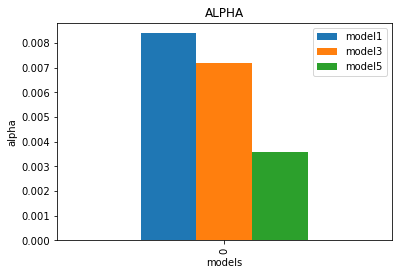

In [89]:
x=pd.DataFrame([alpha1,alpha3,alpha5],index=['model1','model3','model5']).T
x.plot.bar(title='ALPHA',xlabel='models',ylabel='alpha');

In [75]:
bet1 = [beta1]
bet1.append(0)
bet1.append(0)
bet1.append(0)
bet1.append(0)

bet3=[]
for i in beta3.values:
    bet3.append(i)
bet3.append(0)
bet3.append(0)

bet5=[]
for i in beta5.values:
    bet5.append(i)

In [79]:
pd.DataFrame([bet1,bet3,bet5],columns=beta5.index,index=['Model1','Model3','Model5'])

,Mkt-RF,SMB,HML,BAB,QMJ
Model1,0.767613,0.000000,0.000000,0.00000,0.000000
Model3,0.852077,-0.192723,0.294334,0.00000,0.000000
Model5,0.961198,-0.072415,0.304539,0.11288,0.333723


In [112]:
d1 = data['Berkshire Hathaway, total return'].dropna()
d2 = data['Public stocks from 13F, total return'].dropna()

In [138]:
df = pd.concat([d1,d2],axis=1).dropna()
df

,"Berkshire Hathaway, total return","Public stocks from 13F, total return"
date,,
1980-04-30,0.074074,0.068192
1980-05-30,0.137931,0.092465
1980-06-30,-0.060606,0.038221
1980-07-31,0.129032,0.077582
1980-08-29,0.100000,0.041391
...,...,...
2016-11-30,0.094743,0.035223
2016-12-30,0.032729,0.037166
2017-01-31,0.007356,0.021025


In [146]:
exc_rets = df.sub(factor['RF'].reindex(df.index),axis=0)
exc_rets

,"Berkshire Hathaway, total return","Public stocks from 13F, total return"
date,,
1980-04-30,0.061474,0.055592
1980-05-30,0.129831,0.084365
1980-06-30,-0.066706,0.032121
1980-07-31,0.123732,0.072282
1980-08-29,0.093600,0.034991
...,...,...
2016-11-30,0.094643,0.035123
2016-12-30,0.032429,0.036866
2017-01-31,0.006956,0.020625


In [178]:
def fun(x,n,y):
    x1 = x.iloc[:,n]
    mean1 = x1.mean() * 12
    std1 = x1.std()*np.sqrt(12)
    sr1 = mean1 / std1
    x2 = x.iloc[:,y]
    mean2 = x2.mean() * 12
    std2 = x2.std()*np.sqrt(12)
    sr2 = mean2 / std2
    res = pd.DataFrame(data=[[mean1,std1,sr1],[mean2,std2,sr2]],columns=['rRets','std','SR'])
    res.index = ['Berkshire','Portfolio']
    return res

In [179]:
fun(exc_rets,0,1)

,rRets,std,SR
Berkshire,0.167366,0.223048,0.750361
Portfolio,0.120314,0.162465,0.740553
